#### For Vegan Market Overview

In [15]:
# import all neccessary libaries

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import pandas as pd
import re


In [5]:
# Data cleansing without stemming - For Word Cloud Visualization

def cleantext_cloud(text):
    import re
    import contractions
    text = text.lower().strip() # lowercase all letters
    text = re.sub(r'@[A-za-z0-9]+','',text) # remove @mentions
    text = re.sub(r'RT[\s]+','',text) #remove retweet
    text = re.sub(r'https?://\S+','',text) #remove hyperlink
    text = re.sub(r'#','',text) #remove #

    text = text.replace('\n',' ')

    text = contractions.fix(text)

    text = re.sub("[.,!?:;-=*\"'“()_]", "", text) # remove puntucation
    text = re.sub("[0123456789]", "", text) # remove number

    text = text.replace('  ','')

    return text.strip()

In [12]:
# Creating a word cloud for McPlant Tweets Dataframe (DF already demojized)

def create_word_cloud_vegan(df, image_file_name):
    from wordcloud import WordCloud, STOPWORDS 
    import matplotlib.pyplot as plt
    
    # Build customized stopwords
    stopwords = list(STOPWORDS) + ["McPlant","mcplant","mcdonald","McDonald's"] + ["amp","lol","will","https","still"]
                                                       
    # Create the Clean_text column using cleantext_cloud function to output cleaned words from tweets from Vegan Market Tweets Dataframe                       
    df['Clean_text'] = df['Tweet Text'].apply(cleantext_cloud)
    
    text_list = []
    for i in range(df['Clean_text'].shape[0]):
        text_list.extend(df['Clean_text'][i].split())
    
    # Append words not in stopword list to updated_text_list
    updated_text_list = []
    for word in text_list:
        if word not in stopwords:
            updated_text_list.append(word)
            
    # Generate WordCloud
    word=''
    word+=' '.join(updated_text_list)+' '
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(word) 


    # plot the WordCloud image

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    
    return plt.savefig(image_file_name, format="png")

In [9]:
# Loading Vegan Market Tweets csv file

vegan_df = pd.read_csv("clean_text_fake_meat_final.csv",index_col=False)
vegan_df = vegan_df.drop(['Unnamed: 0',
                         'Unnamed: 0.1'],axis=1)
vegan_df.head()

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,User Id,User Location,Retweets,Favorites,Replied Tweet Id,Replied Tweet User Id Str,User Follower Counts,User Following Counts,Tweet Coordinates,Place Info,Hashtags,Keyword,Clean_text,emoji
0,I'm happy that some restaurants are slowly off...,2020-11-16 04:37:45,1328195528048295937,mikelcelestial,55787531,NaN,0,0,NaN,NaN,95,109,NaN,NaN,[],plant based meat,I am happy that some restaurants are slowly of...,[]
1,"""If I source my beef or lamb from low-impact p...",2020-11-16 04:37:23,1328195437803700224,NathanKinch,262864727,Global,0,0,NaN,NaN,1394,1766,NaN,NaN,[],plant based meat,If I source my beef or lamb from low impact pr...,[]
2,Po-led Shakey’s Pizza Asia Ventures Inc. has e...,2020-11-16 04:32:08,1328194113942945792,bilyonaryo_ph,4340349613,NaN,0,0,NaN,NaN,4335,195,NaN,NaN,['BilyonaryoFeatures'],plant based meat,Po led Shakey ’ s Pizza Asia Ventures Inc has ...,[]
3,Sometimes the query arises - if meat is unheal...,2020-11-16 04:30:38,1328193739609624578,jay2406,323677398,"Trivandrum, India 🇮🇳",0,0,1.328194e+18,323677398.0,205,770,NaN,NaN,[],plant based meat,Sometimes the query arises if meat is unhealth...,[]
4,Carnivores have short intestines and colons wh...,2020-11-16 04:30:37,1328193732458414081,jay2406,323677398,"Trivandrum, India 🇮🇳",0,0,1.328194e+18,323677398.0,205,770,NaN,NaN,[],plant based meat,Carnivores have short intestines and colons wh...,[]


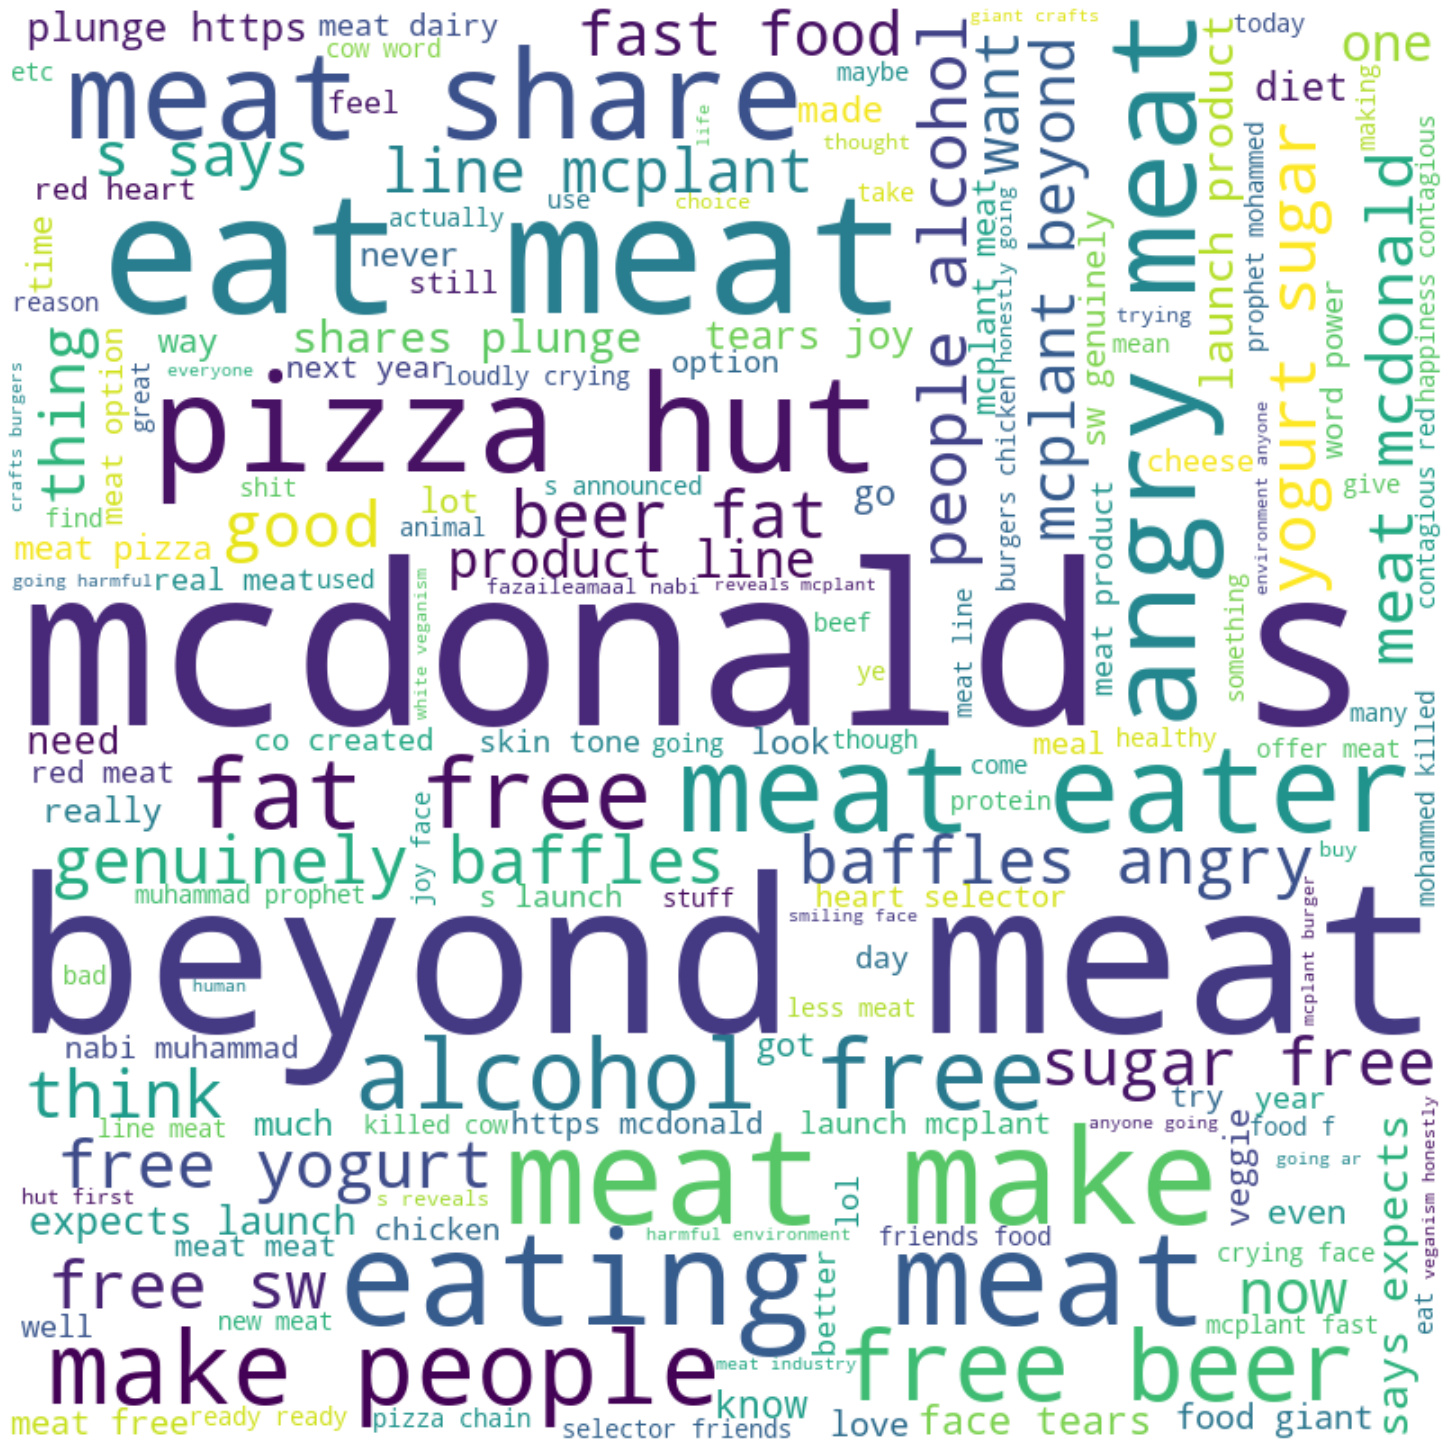

<Figure size 432x288 with 0 Axes>

In [14]:
# Visualize the WordCloud for Vegan Meat Industry

create_word_cloud_vegan(vegan_df, 'vegan.png',(20,20))